## Assessment 2 
## FIT5196-S2-2020 
Student information
- Student Name : Vaibhavi Bhardwaj
- Student ID: 30154987
- Student email: vbha0006@student.monash.edu

## Index
* [A. Introduction](#A.-Introduction)
* [B. Methodology](#B.-Methodology)
* [C. Conclusion](#C.-Conclusion)
* [D. References](#D.-References)


# A. Introduction

The data given is from a retail electronic store in Melbourne and provides the transaction made by the customers. The store sells 10 items as stated in the assessment specification. The assessment provides a problem of cleaning some datasets to fix issues encountered while cleaning data. 

Dirty data has the problem of errors that needs to be fixed. It is known that each row in the dataset has only one error which can be fixed. It is easier to start fixing the errors which are least dependent on any other variable as it is easy to resolve smaller issues. Furthermore, it provides time to think of bigger cases to handle.

Missing data revolves around the concept of finding the best value for cells that are specified null. It utilizes models to help relate many variables to the target variable 'delivery_charges'. Furthermore, models help to follow the data flow or business rule that governs the data.

Finally, the outlier data is presented to find all the possible outliers in the dataset. It also requires modeling as it helps to find the residuals for data. Residuals are something that can be utilized to find outliers.


# B. Methodology

* [1. Importing Libraries](#1.-Importing-Libraries)
* [2. Reading Data](#2.-Reading-Data)
* [3. Dirty Data](#3.-Dirty-Data)
    * [3.1 is_happy_customer check](#3.1-is_happy_customer-check)
        * [3.1.1 Exploring Errors](#3.1.1-Exploring-Errors)
        * [3.1.2 Fixing Error](#3.1.2-Fixing-Error)
    * [3.2 customer_lat & customer_long check](#3.2-customer_lat-&-customer_long-check)
        * [3.1.1 Exploring Errors](#3.1.1-Exploring-Errors)
        * [3.1.2 Fixing Error](#3.1.2-Fixing-Error)
    * [3.3 distance_to_nearest_warehouse & nearest_warehouse check ](#3.3-distance_to_nearest_warehouse-&-nearest_warehouse-check)
        * [3.1.1 Exploring Errors](#3.1.1-Exploring-Errors)
        * [3.1.2 Fixing Error](#3.1.2-Fixing-Error)
    * [3.4 season & date check](#3.4-season-&-date-check)
        * [3.4.1 Exploring Errors](#3.4.1-Exploring-Errors)
        * [3.4.2 Fixing Error](#3.4.2-Fixing-Error)
    * [3.5 order_price, order_total and shopping_cart check ](#3.5-order_price,-order_total-and-shopping_cart-check)
        * [3.5.1 Shopping Cart & Item Price Evaluation](#3.5.1-Shopping-Cart-&-Item-Price-Evaluation)
        * [3.5.2 Exploring Errors](#3.5.2-Exploring-Errors)
        * [3.5.3 Fixing Error](#3.5.3-Fixing-Error)
    * [3.6 order_id, customer_id and is_expedited_delivery check](#3.6-order_id,-customer_id-and-is_expedited_delivery-check)
    * [3.7 Dirty Data Solution](#3.7-Dirty-Data-Solution)
* [4. Missing Data](#4.-Missing-Data) 
    * [4.1 is_happy_customer imputation](#4.1-is_happy_customer-imputation)
    * [4.2 order_price and order_total imputation](#4.2-order_price-and-order_total-imputation)
    * [4.3 order_total imputation](#4.3-order_total-imputation)
    * [4.4 nearest_warehouse & distance_to_nearest_warehouse imputation](#4.4-nearest_warehouse-&-distance_to_nearest_warehouse-imputation)
    * [4.5 delivery_charges imputation](#4.5-delivery_charges-imputation)
        * [4.5.1 Training  and Building Models](#4.5.1-Training--and-Building-Models)
        * [4.5.2 Model Predictions](#4.5.2-Model-Predictions)
    * [4.6 Missing Data Solution](#4.6-Missing-Data-Solution)
* [5. Outlier Data](#5.-Outlier-Data)
    * [5.1 Outlier Data Exploration](#5.1-Outlier-Data-Exploration)
    * [5.2 Model Building & Outlier Detection](#5.2-Model-Building-&-Outlier-Detection)
    * [5.3 Outlier Removal](#5.3-Outlier-Removal)
    * [5.4 Outlier Data Solution](#5.4-Outlier-Data-Solution)

# 1. Importing Libraries

In [505]:
#! pip install yellowbrick
import warnings
warnings.filterwarnings('ignore')

In [506]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import os
import math  
import glob
import nltk.sentiment.vader
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import cooks_distance
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 2. Reading Data

**Loading Cleaning Data**

In [507]:
# Reading data from the files 
# dirty data for fixing errors
dirty_data = pd.read_csv('30154987_dirty_data.csv')
# mising data to fill relevant values
missing_data = pd.read_csv('30154987_missing_data.csv')
# outlier file to remove outliers
outlier_data = pd.read_csv('30154987_outlier_data.csv')

# 3. Dirty Data

Let's print the top 4 rows of dirty data to just know about the data fields and it's structure.

In [508]:
dirty_data.head(4)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD032938,ID1492149394,2019-06-03,Thompson,"[('iAssist Line', 2), ('iStream', 2), ('pearTV...",26320,48.70,-37.813074,144.951563,10,23736.70,Winter,False,0.3977,mal funcionamiento el artículo llego en buenas...,False
1,ORD311374,ID1033063213,2019-08-03,thompson,"[('Toshika 750', 2), ('iAssist Line', 2)]",13090,65.91,-37.800689,144.994321,0,13155.91,Winter,False,1.0391,ok phone i got this phone for my mother she li...,True
2,ORD396995,ID0710001211,2019-02-21,Thompson,"[('iStream', 2), ('Alcon 10', 1), ('Universe N...",16150,76.31,-37.814016,144.936078,10,14611.31,Summer,False,0.9780,thank you. b thank you. b,False
3,ORD435122,ID0033675616,2019-12-07,Thompson,"[('Thunder line', 1), ('Universe Note', 2), ('...",21700,93.24,-37.809084,144.955502,15,18538.24,Summer,True,0.8424,i love my inferno stick,True


In [509]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

Duplicate rows check.

In [510]:
# Code to check number of duplicates in the dataframe
len(dirty_data[dirty_data.duplicated()]) # 0 is the result

0

Since, the number of duplicates are zero we can say each row is unique.

**"check" column for tracking the checked or corrected columns**

It is given in the assignment specifications that each row has a single error and the same information can be utilized to our advantage when needed.

In [511]:
#A temperory field if created to capture error free rows in the dataset.
dirty_data['check']=False

The errors are searched in a specific pattern. It is clear that the data can only be fixed for a particular dependent cell when its corresponding independent cell is fixed or is error-free. 

## 3.1 is_happy_customer check

A boolean denoting whether the customer is a happy customer or had an issue with his/her last order.

### 3.1.1 Exploring Errors

**is_happy_customers** is checked 1st as it is directly dependent on **latest_customer_review**. **latest_customer_review** as stated in the specifications is clean. It is known that the **is_happy_customers** is dependent on **latest_customer_review**. Furthermore, the customer with None as the **latest_customer_review** is considered as a new customer. Let's check the correctness of **is_happy_customers** col and the number of errors. These errors will fall under semantic anomalies since is_happy_customers is related to latest_customer_review.

Building a function to find the correct sentiment.

In [512]:
def find_sentiment(review):
    # Defining SentimentIntensityAnalyzer to check the sentiment.
    sentim_analyzer = SentimentIntensityAnalyzer()
    # Compound polarity being calculated
    sentiment = sentim_analyzer.polarity_scores(review)['compound']
    
    # customer is happy if compound is greater than 0.05 or is a new customer by review as "None"
    if sentiment>=0.05 or (review=='None'):
        happy = True # customer is happy
    else:
        happy = False # customer is unhappy
        
    return happy 

In [513]:
# counter to count the number of is_happy_customer errors
is_happy_customer_faults = 0

# Iterating through the dataframe to check 
for index, row in dirty_data.iterrows():
    
    # Analyse sentiments by calling the find_sentiment function
    if row['is_happy_customer']!= find_sentiment(row['latest_customer_review']):
        # printing the latest_customer_review and their fault sentiments
        if is_happy_customer_faults<5:
            print("Index:",index,", ERROR:",row['is_happy_customer'],", Review:",row['latest_customer_review'])
        # increasing the error counter 
        is_happy_customer_faults = is_happy_customer_faults+1
        #print("\n")
    
print("\n.......................................................")
print("Total is_happy_customer errors:",is_happy_customer_faults)

Index: 2 , ERROR: False , Review: thank you. b thank you. b
Index: 6 , ERROR: False , Review: excellent seller. would purchase from seller again product as described. excellent seller. would purchase from seller again.
Index: 14 , ERROR: False , Review: i love my new droid mobile after using an alcon for years, i love my new droid mobile. it takes a bit to adjust but the more i have it the better it is. after a few weeks of use. no problems with phone.
Index: 63 , ERROR: False , Review: awesome deal love the phone checked out battery, speakers, and touch screen! it was in excellent condition and was unlocked as it says! definitely worth the money and will buy from here again!! thanks
Index: 98 , ERROR: False , Review: works great seems to be a good value. phone works great.

.......................................................
Total is_happy_customer errors: 27


27 is_happy_customer errors are to be fixed.

### 3.1.2 Fixing Errors

Fixing the errors in the **is_happy_customer** cols.

In [514]:
# Iterating through the dataframe to check 
for index, row in dirty_data.iterrows():
    # Producing error free sentiment 
    true_happy = find_sentiment(row['latest_customer_review'])
    
    # Analyse sentiments by calling the find_sentiment function
    if row['is_happy_customer']!= true_happy:
        # substituting the correct sentiment
        dirty_data.iloc[index,dirty_data.columns.get_loc('is_happy_customer')] = true_happy
        # Updating the check col to identify the row had an error
        dirty_data.iloc[index,dirty_data.columns.get_loc('check')] = True

Total number of errors encountered and fixed so far are 27.

In [515]:
sum(dirty_data['check'])

27

Error Breakdown till now:
- 27 is_happy_customer errors

## 3.2 customer_lat & customer_long check

Customer location is given in longitudes and latitudes. For a position to be valid the latitudes and longitude should be from -90 to 90 and -180 to 180 respectively. Let's try and see if the fields follow the given condition.
Since out of latitude or longitude only one can be wrong let's examine customer_lat. 

### 3.2.1 Exploring Errors

In [516]:
# Condition to check if latitude is not in the range -90 to 90.
lat_condition = (abs(dirty_data.customer_lat)>90)

# Let's print and see the errors
print("\nFew Error positions")
print(dirty_data.loc[lat_condition,['customer_lat','customer_long']][:10])

# let's print some correct values
print("\nFew correct positions")
print(dirty_data.loc[False==lat_condition,['customer_lat','customer_long']][:10])

# Printing the Number of errors in postion
print("\n........................................................")
print("Total customer_lat & customer_long errors:",sum(lat_condition)) # 27 Position condition errors


Few Error positions
     customer_lat  customer_long
32     144.969573     -37.814543
77     144.948950     -37.808890
92     144.984801     -37.812884
96     144.962478     -37.823805
125    144.947178     -37.818903
135    144.953623     -37.817036
153    144.973653     -37.805352
158    144.948643     -37.800467
173    144.967145     -37.821538
174    144.937396     -37.816201

Few correct positions
   customer_lat  customer_long
0    -37.813074     144.951563
1    -37.800689     144.994321
2    -37.814016     144.936078
3    -37.809084     144.955502
4    -37.806441     144.999719
5    -37.806849     144.997909
6    -37.817815     144.974636
7    -37.802895     144.948611
8    -37.813511     144.965592
9    -37.801942     144.926916

........................................................
Total customer_lat & customer_long errors: 27


The error presented with position coordinates can be fixed by swapping the customer_lat and customer_long. Furthermore, it can be seen that customer_lat is always greater than customer_long in errors. These errors will fall under semantic anomalies since we they are related to one another.

### 3.2.2 Fixing Errors

In [517]:
# customer_lat are always greater customer_long for errors
wrongDataIdx = (dirty_data['customer_lat'] > dirty_data['customer_long'])

# Swapping them in the next step for true values
# Fixing 27 position errors
dirty_data.loc[wrongDataIdx,['customer_lat','customer_long']]=dirty_data.loc[wrongDataIdx,['customer_long','customer_lat']].values

# Upadting the check col for fixed error rows
for index in range(len(wrongDataIdx)):
    # if index is true than error is fixed
    if wrongDataIdx[index]==True: 
        # updating check  col for fixed errors
        dirty_data.iloc[index,dirty_data.columns.get_loc('check')]=True

Total number of errors encountered and fixed so far is 54.

In [518]:
# Total resolved errors
sum(dirty_data['check'])

54

Error Breakdown till now:
- 27 is_happy_customer errors
- 27 customer_lat & customer_long errors

## 3.3 distance_to_nearest_warehouse & nearest_warehouse check

After rectifying the coordinates it is best to work on distance_to_nearest_warehouse and nearest_warehouse. It is perfectly clear that nearest_warehouse and distance_to_nearest_warehouse are dependent on customer coordinates. 

From the customer coordinates, we can find the nearest coordinate (of the correct nearest_warehouse and respective correct distance_to_nearest_warehouse) out of the 3 warehouse coordinate given in the "warehouse.csv" data. 

**Loading warehouse data for warehouse coordinates**

In [519]:
warehouse = pd.read_csv('warehouses.csv')
print(warehouse)

       names        lat         lon
0  Nickolson -37.818595  144.969551
1   Thompson -37.812673  144.947069
2     Bakers -37.809996  144.995232


Row number and names in warehouse dataframe :
- 0 : Nickolson 
- 1 : Thompson 
- 2 : Bakers

### 3.3.1 Exploring Errors

The following function will be utilised to find the correct nearest warehouse to the customer and the distance.

In [520]:
# Function to return the nearest warehouse and it's distance to the customer
# Input is the error free customer lat and long.
def distance(lat2,lon2):
    
    # Temporary dictionary with key as warehouse name and value as distance
    # key:value== warehouse name : distance from customer
    list_distance = dict() 
    
    # calling the distance_to function to return the distance to 'Nickolson' warehouse
    list_distance['Nickolson'] = distance_to(0,lat2,lon2) # 0 row is for Nickolson in warehouse data   
    # calling the distance_to function to return the distance to 'Thompson' warehouse
    list_distance['Thompson'] = distance_to(1,lat2,lon2) # 1 row is for Thompson in warehouse data   
    # calling the distance_to function to return the distance to 'Bakers' warehouse
    list_distance['Bakers']= distance_to(2,lat2,lon2) # 2 row is for Bakers in warehouse data
    
    # Sorting the dictionary on the bases of distance as it is the value
    list_distance = sorted(list_distance.items(), key=lambda x: x[1])
    
    # Catching the nearest warehouse and corresponding distance from the sorted dictionary
    warehouse_name = list_distance[0][0] # nearest warehouse
    distance_shortest = list_distance[0][1] # distance
    
    # returning the accurate nearest warehouse and shortest distance
    return (warehouse_name,distance_shortest)


# Function is formed to find the distance in km from one coordinate to another.
# Input to this function is customer coordinates & warehouse row index corresponding to a particular warehouse
def distance_to(DataIdx,lat2,lon2):
    
    # Warehouse latitude at index "DataIdx"
    lat1 = warehouse.loc[DataIdx,['lat']]
    # Warehouse longitude at index "DataIdx"
    lon1 = warehouse.loc[DataIdx,['lon']]
    
    # Radius of earth needed for calculation
    radius_earth = 6378 
    
    # finding the radian distance for lats and longs
    distance_latitude = math.radians(lat2-lat1)
    distance_longitude = math.radians(lon2-lon1)
    
    # Calculating the distance in degrees 
    # part_a = sinMsinN+cosAcosB+sinKsinL
    # Applying mathematical formula to find distance in km.
    part_a = math.sin(distance_latitude/2) * math.sin(distance_latitude/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2))\
        * math.sin(distance_longitude/2) * math.sin(distance_longitude/2)
    part_c = 2 * math.atan2(math.sqrt(part_a), math.sqrt(1-part_a))
    #The distance in degrees is found in kms
    part_d = radius_earth * part_c
    
    # Returing the rounded distance to 4 decimal places. 
    # Rounded to 4 decimal places because distance_to_nearest_warehouse col has values rounded to 4 decimal places
    return round(part_d,4) 


Finding the number of errors. The errors fall under semantic anomalies.

In [521]:
# Adjusting the data to 4 decimal places as most of the data in distance_to_nearest_warehouse is rounded to 4
# Some values were found not to be not rounded to 4 which was seen in the csv file
dirty_data['distance_to_nearest_warehouse']= round(dirty_data['distance_to_nearest_warehouse'],4)

# Counter to count warehouse name error
warehouse_error = 0
# Counter to count nearest distance error
distance_error = 0

#Iterating through the rows to find the number of nearest_warehouse and  distance_to_nearest_warehouse errors
# Printing 1st 2 errors in nearest_warehouse and distance_to_nearest_warehouse.
print("Printing the 1st 3 errors:\n")
for index, row in dirty_data.iterrows():

    # Calling distance function to return the nearest warehouse and it's distance from customer lat and long
    distance_km = distance(row['customer_lat'],row['customer_long'])
    
    # Checking for error in nearest_warehouse
    if distance_km[0]!=row['nearest_warehouse']:
        # if found increment the warehouse_error counter
        warehouse_error = warehouse_error +1
        if (warehouse_error<3):
            print("Accuarte nearest_warehouse:",distance_km[0],"Error:",row['nearest_warehouse'],"Index:",index,"\n")
    
    # Checking for error in distance_to_nearest_warehouse
    elif distance_km[1]!=row['distance_to_nearest_warehouse']:
        # if found increment the distance_error counter       
        distance_error = distance_error +1
        if (distance_error<3):
            print("Accuarte distance:",distance_km[1],"Error:",row['distance_to_nearest_warehouse'],"Index:",index,"\n")

            
print(".........................")
print("Total nearest_warehouse errors:",warehouse_error)
print("Total distance_to_nearest_warehouse errors:",distance_error)

Printing the 1st 3 errors:

Accuarte nearest_warehouse: Bakers Error: thompson Index: 1 

Accuarte distance: 1.5074 Error: 0.2247 Index: 19 

Accuarte nearest_warehouse: Nickolson Error: bakers Index: 29 

Accuarte distance: 0.9147 Error: 0.9759 Index: 46 

.........................
Total nearest_warehouse errors: 27
Total distance_to_nearest_warehouse errors: 27


### 3.3.2 Fixing Errors

It is interesting to see that "nearest_warehouse" errors and "distance_to_nearest_warehouse" are 27 each.

In [522]:
#Iterating through the rows to find the number of nearest_warehouse and  distance_to_nearest_warehouse errors
for index, row in dirty_data.iterrows():
    # Calling distance function to return the nearest warehouse and it's distance from customer lat and long
    distance_km = distance(row['customer_lat'],row['customer_long']) #0th index has 
    
    # Checking for errors in nearest_warehouse or distance_to_nearest_warehouse col.
    if distance_km!=(row['nearest_warehouse'],row['distance_to_nearest_warehouse']):
        
        # Rectifying "distance_to_nearest_warehouse" cell.
        dirty_data.iloc[index,dirty_data.columns.get_loc('distance_to_nearest_warehouse')] =  distance_km[1]
        # Rectifying "nearest_warehouse" cell.
        dirty_data.iloc[index,dirty_data.columns.get_loc('nearest_warehouse')] =  distance_km[0]
        
        # updating check col for fixed errors
        dirty_data.iloc[index,dirty_data.columns.get_loc('check')]=True
        

Total number of errors encountered and fixed so far is 108.

In [523]:
sum(dirty_data['check'])

108

Error Breakdown till now:
- 27 is_happy_customer errors
- 27 customer_lat & customer_long errors
- 27 distance_to_nearest_warehouse errors
- 27 nearest_warehouse errors

## 3.4 season & date check

As the date format follows a 'YYYY-MM-DD' format in the dataset. Let's check if it is similar to the given requirements. Here, I am only checking the pattern as XXXX-XX-XX and not comparing YYYY-MM-DD to YYYY-MM-DD. Further checks and exploration on the order of month and date will be done later while correcting the errors.  

In [524]:
# Data points which follow "XXXX-XX-XX" pattern
sum(dirty_data['date'].str.match('[0-9]{4}-[0-9]{2}-[0-9]{2}')) 
# 488 follow XXXX-XX-XX pattern
# This doesn't mean they all are in "YYYY-MM-DD" format

488

In [525]:
# Data points which follow "XX-XX-XXXX" pattern
sum(dirty_data['date'].str.match('[0-9]{2}-[0-9]{2}-[0-9]{4}')) 
# 12 follow XX-XX-XXXX pattern
# This doesn't mean they all are in "MM-DD-YYY" or "DD-MM-YYY" format

12

Season and Date are related to each other. A correct date is good to find the season. Furthermore, the correct season can be utilized to verify a date. 
The above code clearly specifies that we have  488 rows following the "XXXX-XX-XX" pattern but we don't know what all are correct. And season field is dependent on the month. 
Furthermore, 12 records don't follow the "YYYY-MM-DD" and have a pattern  like "XX-XX-XXXX".

Out of date and season, only one can have an error in the given dataset and this fact is taken into the discussion.
The acceptable date format is "YYYY-MM-DD".
Now we have the following cases to think about for the date and seasons be fixed:
- **Case A**: Data in "xxxx-x'x'-xx" format.
    - Case A1: But x'x' is greater than 12----Meaning the **date** is in "YYYY-DD-MM" format and needs to be fixed to "YYYY-MM-DD" by swapping x'x' with xx. In this case, the season value is correct as only one field can be wrong in a row.
    - Case A2: If x'x' is less than 12 --- Meaning the **season** is wrong and can be corrected by using the month part of the date. Furthermore, we don't have to ponder on the date as it already exists in "YYY-MM-DD" format.
- **Case B**: Data in "xx-x'x'-xxxx" format.This condition suggests that Season is correct. **Date** is an error.
    - Case B1: The date is in the format "DD-MM-YYYY" by checking season for the month x'x' . This can be fixed by reversing the date format to "YYYY-MM-DD".  If this case is false, move to case 2.
    - Case B2 : The date is in the format "MM-DD-YYYY". This can be fixed by shuffling "xx-x'x'-xxxx" to "xxxx-xx-x'x'" to make it in the form "YYYY-MM-DD".
    
The errors will fall under semantic and syntactic anomalies. Since, date and season string fromat is syntactic anomaly while a violation of relation between them will lead to semantic anomaly. The below code follows the above case examination and corresponding error removal is done.

In [526]:
# Making a dictionary to store month number and corresponding season 
season_dict = dict()
# KEY is month number and VALUE is season
season_dict = {1:'Summer',2:'Summer',12:'Summer',3:'Autumn',4:'Autumn',5:'Autumn',
               6:'Winter',7:'Winter',8:'Winter',9:'Spring',10:'Spring',11:'Spring'}

let's make a date and season check function.

In [527]:
# Date and season check function 
# Inputs the date string and the season string for a partiicular row
def date_check(text,season):
    
    # assigning the date string to a temporary string
    # let's assume date string.
    text_temp = text
    
    # Splitting the date string to a list with "XXXX", "X'X'" and "XX" as the compnents. Can be in any order.
    temp_list = text.split("-") # splitting the date to a list
    
    
    # Case A
    if int(temp_list[1])>12: 
        # if true follow Case A1 if false check for Case B       
        # date in "YYYY-DD-MM" format
        month  = temp_list[2] #extracting month from list and is at the 2nd index 
        date = temp_list[1] #extracting date from list and is at the 1st index 
        year = temp_list[0] #extracting date from list and is at the 0th index 
        
        #joining the string to the desired format for Case A1.
        text = year+"-"+month+"-"+date
        # Returning the Season and date
        return(season.capitalize(),text)
    
    # Case B
    elif len(temp_list[2])>3:
    # If true date in "xx-x'x'-xxxx" and season is correct    
        # Case B1
        # season_dict[int(temp_list[1])] if to find the season for the month.
        if season.capitalize() ==season_dict[int(temp_list[1])]:
            # Case B1 is true
            # If true that means the 1st index element of "xx-x'x'-xxxx" split is a month.
            month = temp_list[1] # extracting month from list and is at the 1st index 
            date = temp_list[0] #extracting date from list and is at the 0th index 
            year = temp_list[2] # extracting year from list and is at the 2nd index 
            
            
        # Case B2 is true
        else:
            # The string is in "MM-DD-YYYY" format and is an error.
            month = temp_list[0] # extracting month from list and is at the 0th index
            date = temp_list[1] #extracting date from list and is at the 1st index 
            year = temp_list[2] # extracting year from list and is at the 2nd index
        
        #joining the string to the desired format for Case B  
        text = year+"-"+month+"-"+date
        # Returning the Season,date 
        return(season.capitalize(),text)
    
    
    # Case A2 is left to treat. The date is correct but the season should corresond to the month.
    # joining the string to the desired format for Case A2 
    text = temp_list[0]+"-"+temp_list[1]+"-"+temp_list[2]
    # Returning the Season of the corresponding month and the  date
    return (season_dict[int(temp_list[1])],text)

### 3.4.1 Exploring Errors

Finding total errors for season and date col. 

In [528]:
# Initializing counter to counte date and season error
date_error = 0
season_error = 0 

print("Printing some Season and Date errors:")

# Iterating to check for possible errors
for index, row in dirty_data.iterrows():   
    # Finding the accurate season and date pair
    season_correct,date_correct = date_check(row['date'],row['season'])
    
    # If same than no season error is reported.
    if season_correct != row['season']: 
        
        # incrementinng season error when encountered
        season_error = season_error +1
        
        # printing less than 3  season errors
        if season_error<3:
            # Printing the errors and it's accurate value
            print("\n***Season Error***\n","Error Season:",row['season'],", Accurate Season:",season_correct,", Date:",row['date'])
               
        
    # Date error checking
    elif row['date']!= date_correct:
        
        # incrementinng date error when encountered            
        date_error = date_error +1
        
        # printing less than 3  date errors
        if date_error<3:
            # Printing the errors and it's accurate value
            print("\n***Date Error***\n","Error Date:",row['date'],", Accurate Date:",date_correct,", Season:",row['season'])

print("\n.........................")
print("Total Date Errors:",date_error,"\nTotal Season Errors:",season_error)

Printing some Season and Date errors:

***Season Error***
 Error Season: Spring , Accurate Season: Winter , Date: 2019-06-02

***Season Error***
 Error Season: winter , Accurate Season: Autumn , Date: 2019-04-23

***Date Error***
 Error Date: 2019-20-03 , Accurate Date: 2019-03-20 , Season: Autumn

***Date Error***
 Error Date: 2019-19-07 , Accurate Date: 2019-07-19 , Season: Winter

.........................
Total Date Errors: 27 
Total Season Errors: 27


Some errors are printed above along with the correct values. It shows where the error is.

### 3.4.2 Fixing Error

In [529]:
# Fixing the errors by substituting the correct 
for index, row in dirty_data.iterrows():
    # Finding the accurate season and date values
    season_correct,date_correct = date_check(row['date'],row['season'])
    
    # if date or season is inaccurate they are fixed
    if (row['date']!= date_correct or row['season']!=season_correct):# and row['check']==False:
        # Season col update
        dirty_data.iloc[index,dirty_data.columns.get_loc('season')] =  season_correct
        # Date col update
        dirty_data.iloc[index,dirty_data.columns.get_loc('date')] =  date_correct
        # check col is updated
        dirty_data.iloc[index,dirty_data.columns.get_loc('check')] = True

Total number of errors encountered and fixed so far is 162.

In [530]:
sum(dirty_data['check'])

162

Error Breakdown till now:
- 27 is_happy_customer errors
- 27 customer_lat & customer_long errors
- 27 distance_to_nearest_warehouse errors
- 27 nearest_warehouse errors
- 27 date errors
- 27 season errors

Seems every col has 27 errors!!! Interesting.

## 3.5 order_price, order_total and shopping_cart check

### 3.5.1 Shopping Cart & Item Price Evaluation

Asssement Notes:
**6. The retail store focuses only on 10 branded items and sells them at competitive prices.**

In the assessment notes it is clearly stated that there are 10 items sold by the retail store. So let's find what are they.1st let's study the structure of the shopping_cart col. 

In [531]:
# Printing 10 rows of shopping cart to study the structure
dirty_data.shopping_cart[:10]

0    [('iAssist Line', 2), ('iStream', 2), ('pearTV...
1            [('Toshika 750', 2), ('iAssist Line', 2)]
2    [('iStream', 2), ('Alcon 10', 1), ('Universe N...
3    [('Thunder line', 1), ('Universe Note', 2), ('...
4    [('Lucent 330S', 1), ('iStream', 1), ('pearTV'...
5    [('Candle Inferno', 1), ('Lucent 330S', 2), ('...
6    [('Thunder line', 1), ('Candle Inferno', 2), (...
7                [('iAssist Line', 2), ('iStream', 1)]
8           [('Toshika 750', 2), ('Universe Note', 2)]
9    [('Lucent 330S', 1), ('iStream', 2), ('Toshika...
Name: shopping_cart, dtype: object

The cart is a list of tuples. And each tuple has an item name with the quantity of the item bought.

In [532]:
# Item set initialised to store all unique items.
item_set = set()

# Iterating rows in the dirty_data 
for index, row in dirty_data.iterrows():
    # running a loop on the list 
    for i in eval(dirty_data.iloc[index,dirty_data.columns.get_loc('shopping_cart')]):
        # each tuple has a item and quantity pair
        # 0th index of the tuple the item name is specified which is appended to the set 
        item_set.add(i[0])  

# Sorting the set to a list.
# Items in alphabetical order
item_list = sorted(list(item_set))

The 10 unique items are given below.

In [533]:
print(item_list)

['Alcon 10', 'Candle Inferno', 'Lucent 330S', 'Olivia x460', 'Thunder line', 'Toshika 750', 'Universe Note', 'iAssist Line', 'iStream', 'pearTV']


Let's find the price of each item as it is said they are sold at a competitive price by the retailer. This can only be done by taking "order_price" into consideration but not all rows in the dataset have the correct "order_price". To solve this issue it is most accurate to take rows which are already error-free i.e. for check col to be equal to "True".
Furthermore, 10 equations linear equations for 10 variables in other words 10 rows for 10 variables.

In [534]:
# 10 rows are selected and stored in a dataframe names true_data # 10 equations , 10 variables
true_data = dirty_data[dirty_data.check==True][:10]
# Printing shopping_cart and order_price details of true_data
print(true_data[["shopping_cart","order_price"]])

                                        shopping_cart  order_price
1           [('Toshika 750', 2), ('iAssist Line', 2)]        13090
2   [('iStream', 2), ('Alcon 10', 1), ('Universe N...        16150
6   [('Thunder line', 1), ('Candle Inferno', 2), (...         6490
11               [('iAssist Line', 1), ('pearTV', 2)]        14845
14  [('iStream', 2), ('Alcon 10', 1), ('Candle Inf...         9680
19  [('Toshika 750', 1), ('iAssist Line', 2), ('Th...        10950
26  [('Alcon 10', 1), ('Universe Note', 2), ('Luce...        17080
29  [('Alcon 10', 2), ('Thunder line', 1), ('Olivi...        25755
31               [('iStream', 2), ('Olivia x460', 2)]         2750
32          [('Lucent 330S', 1), ('Thunder line', 1)]         3410


To find the value of each variable a 10x10 matrix to store variable coefficients of each equation is to be formed. Each equation is formed by taking the item name as the variable and quantity as the coefficient from the "shopping_cart" attribute. 

**Linear Equation format** 

    
**y = a$*$X_0 + b$*$x_1+ c$*$x_2+ d$*$x_3+ n$*$x_4 + m$*$x_5 + k$*$x_6 + l$*$x_7 + p$*$x_8 + g$*$x_9**

where,
- y is the order_price 
- and a$*$x_0 + b$*$x_1+ c$*$x_2+... + g$*$x_9 is the summation of product of coefficient and corresponding variable.

In [535]:
# Linear Equation format : y = a*x_0 + b*x_1+ c*x_2+ d*x_3+ n*x_4 + m*x_5 + k*x_6 + l*x_7 + p*x_8 + g*x_9
# where y is the order_price
# and a*x_0 + b*x_1+ c*x_2+....+ g*x_9 is the summation of product of coeff and corresponding variable.

# 10*10 matrix initialisation storing a,b,c,c...and g values
matrix = list()

# List of y that is the order_price for each equation
y = list()

# Iterating throw true_data to form a matrix
for index, row in true_data.iterrows():
    
    # converting string to it's corresponging value
    cart = eval(row['shopping_cart'])
    
    # Making a temp coeff list for an individual shopping cart
    # initialising each coeff to 0 for each variable
    coeff_list = [0]*10
    
    # iterating through the cart to update the coeff for each item occuring in the cart.
    for i in cart:
        coeff_list[item_list.index(i[0])]=i[1]
    
    # appending the coeff_list to the matrix to hold 10 coeff lists of 10 variables
    # a*x_0 + b*x_1+ c*x_2+ d*x_3+ n*x_4 + m*x_5 + k*x_6 + l*x_7 + p*x_8 + g*x_9
    matrix.append(coeff_list)
    
    # appending the order price (y) of the shopping cart to form a linear equation
    y.append(row['order_price'])

The coefficient matrix formed.

In [536]:
# Coeffecient matrix for 10 equations
matrix

[[0, 0, 0, 0, 0, 2, 0, 2, 0, 0],
 [1, 0, 0, 0, 0, 0, 2, 0, 2, 0],
 [0, 2, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 2],
 [1, 1, 0, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 0, 0, 1, 1, 0, 2, 0, 0],
 [1, 0, 1, 0, 0, 0, 2, 0, 0, 0],
 [2, 0, 0, 1, 1, 0, 0, 2, 0, 0],
 [0, 0, 0, 2, 0, 0, 0, 0, 2, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0]]

Price of each item.

In [537]:
# Converting matrix to a 2D array
A = np.array(matrix)
# Converting y into an array
B = np.array(y)

# Now solving the linear equations by utilisind linalg in numpy
# X is the price for each item in the item_list
# item_list and price in X are in the same order.
X = np.linalg.solve(A,B)

In [538]:
# Printing list item and it's corresponding price
print(item_list)
print(X)

['Alcon 10', 'Candle Inferno', 'Lucent 330S', 'Olivia x460', 'Thunder line', 'Toshika 750', 'Universe Note', 'iAssist Line', 'iStream', 'pearTV']
[8950.  430. 1230. 1225. 2180. 4320. 3450. 2225.  150. 6310.]


Alcon 10 (price - 8950) is the most expensive product out of 10 items in the store. iStream is the least expensive of all which is priced as 150.

### 3.5.2 Exploring Errors

order_total is calculated by discounting order_price plus delivery_charges. It is given that delivery_charges, coupon_discount, and quantity value in the shopping cart are always error-free. This leaves us with order_price, order_total, and cart items which may contain errors. Only one column can contain an error out of the 3 columns if there is an error and it is present in one of the 3 columns.
Out of the 3 columns, only 1 can be wrong at a time. Hence, I have come up with the following conditions and cases to resolve the error. 
Let there be 4 variables :
- OP- order price is the order_price quantity from the dataset.
- OP'- new order price calculated using the linear equation and the given cart. 
- TO- total order is the order_total value from the dataset 
- TO' - total order calculated by using OP*(1-0.01*coupon_disount)+ delivery_charge i.e. by applying the rule that order total is calculated by discounting order_price plus delivery_charges.

The 3 conditions so formed after defining the variables:

- Case **A**: **shopping_cart** is the error
    - if TO is the same as calculated total order meaning TO' and OP is not equal to calculated order price i.e. OP'. Implying OP' is calculated using the wrong shopping cart and one of the items is faulty in the shopping_cart. Hence, shopping_cart needs to be fixed by changing one item in the cart and the fixed cart should match the order_price attribute.


- Case **B**: **order_price** is the error
    - if TO is not equal to TO' (as $TO'= OP*(1-0.01*$ coupon_disount $)+ $ delivery_charge $)$ and OP is also not equal to OP'. This means that OP isn't correct and is leading to inequality in both the conditions. Hence, order_price needs to be changed from OP to OP' which was calculated using the shopping cart details.


- Case **C**: **order_total** is the error
    - If OP is equal to OP' and TO isn't equal to TO'. Implying, the shopping_cart and order_price are correct as OP and OP' are equal and TO i.e. order_total is the error. order_total can be fixed by assigning its value to OT'.

Errors in these 3 columns will fall under semantic anomaly as all the 3 are related to one another. Let's build a function to get the accurate cart of the same order_price.

In [539]:
# The function return an accurate cart 
# Arguments of this function is cart:incorrect cart & target: the correct order price which the cart should give
def new_cart(cart,target):
    
    # evaluating the string cart to a list of tuples
    cart = eval(cart)
    
    # Iterating through each item in the incorrect cart 
    for item_index in range(len(cart)):
        
        # the item will be changed for each product,quantity pair 
        # and X.dot will be performed for changed cart till the resultant matches the target        
        # for each item in item_list ** Reminder: Item_list has all 10 the names of the products the retailer sells. 
        for product in item_list:
            
            # maiking a new coeff list for an item change in the cart
            coeff_list = [0]*10
            
            #make the new temp coeff list by all the items
            for items in range(len(cart)):
                
                # if item_index is same as items than change the item to "product" for the coeff list
                if item_index==items:
                    # coeff assigned to the changed item that is "product"
                    coeff_list[item_list.index(product)]=cart[items][1]
                
                else:
                    # else it remains same as the cart
                    coeff_list[item_list.index(cart[items][0])]=cart[items][1]
            
            # After making the changes to the coeff list
            # let's check if this change in item name actually 
            # results in a cart which gives the same order_price as the given target.
            # X.dot to array od coeff_list is perfromed to get the order price of the changed cart list
            if target == round(X.dot(np.array(coeff_list))): 
                # if true,changes at item_index tuple is performed
                
                # tuple at item_index'th index of cart is taken.
                temp_list = list(cart[item_index]) # [item name,quantity] is the the temp_list 
                temp_list[0]=product # Changing 0th index to product
                cart[item_index] = tuple(temp_list) # assigning the changed tuple to the cart at index item_index
                
                # returning the accurate cart
                return cart

In [540]:
# Initialising variables to count errors
order_price_error = 0
order_total_error = 0
shopping_cart_error = 0

# Printing some errors of each type
print("Printing some errors:")

# iterating through the rows of the dataframe 
for index, row in dirty_data.iterrows():
    
    # evaluating cart to list for the current row
    cart = eval(row['shopping_cart'])
    # initialising a coeff list
    coeff_list = [0]*10
    for i in cart:
        # assigning values to the coeff list
        coeff_list[item_list.index(i[0])]=i[1]
        
    # calculated order price or OP'
    cal_order_price = round(X.dot(np.array(coeff_list))) # OP'
    
    #calculated total order or OT' = OP*(1-0.01*coupon_disount)+ delivery_charge
    old_total_order = round(row['delivery_charges']+row['order_price']*(1-0.01*row['coupon_discount']),2) #OT'
    
    #Case C check i.e. order_total check
    # OT!=OT' and OP!=OP': if true
    if row['order_total']!=old_total_order and  row['order_price']!=cal_order_price:# order_price error
        # incrementing the error
        order_price_error = order_price_error + 1
        #printing for less than 5 errors
        if order_price_error<5:
            print("order_price","shopping_cart","order_total")
            print(row['order_price'],row['shopping_cart'],row['order_total'])
            print("Error order_price:",row['order_price'],"\nAccurate order_price:",cal_order_price,"\n")
    
    #Case B check i.e. order_price check
    # OT!=OT' and OP==OP': if true
    elif row['order_price']==cal_order_price and row['order_total']!=old_total_order: # order_total error
        # incrementing the error
        order_total_error = order_total_error + 1
        
        #printing for less than 5 errors        
        if order_total_error<5:           
            print("order_price","shopping_cart","order_total")
            print(row['order_price'],row['shopping_cart'],row['order_total'])
            print("Error order_total:",row['order_total'],"\nAccurate order_total:",old_total_order,"\n")
      
    #Case A check i.e. shopping_cart check
    # OT==OT' and OP!=OP': if true
    elif row['order_total']==old_total_order and row['order_price']!=cal_order_price: # shopping_cart error
        # incrementing the error
        shopping_cart_error = shopping_cart_error + 1
        if shopping_cart_error<5:
            print("order_price","\tshopping_cart","\torder_total")
            print(row['order_price'],"\t",row['shopping_cart'],"\t",row['order_total'])
            print("Error shopping_cart:",row['shopping_cart'],"\nAccurate shopping_cart:",\
                  str(new_cart(row['shopping_cart'],row['order_price'])),"\n")

# printing the total number of errors
print(".........................")
print("Total order_price_error:",order_price_error)
print("Total order_total_error:",order_total_error)
print("Total shopping_cart_error:",shopping_cart_error)

Printing some errors:
order_price 	shopping_cart 	order_total
11260 	 [('Toshika 750', 2), ('Universe Note', 2)] 	 11358.88
Error shopping_cart: [('Toshika 750', 2), ('Universe Note', 2)] 
Accurate shopping_cart: [('Thunder line', 2), ('Universe Note', 2)] 

order_price 	shopping_cart 	order_total
3755 	 [('Lucent 330S', 1), ('iStream', 2), ('Toshika 750', 1)] 	 3463.35
Error shopping_cart: [('Lucent 330S', 1), ('iStream', 2), ('Toshika 750', 1)] 
Accurate shopping_cart: [('Lucent 330S', 1), ('iStream', 2), ('iAssist Line', 1)] 

order_price 	shopping_cart 	order_total
5585 	 [('Universe Note', 1), ('Thunder line', 2)] 	 5085.92
Error shopping_cart: [('Universe Note', 1), ('Thunder line', 2)] 
Accurate shopping_cart: [('Olivia x460', 1), ('Thunder line', 2)] 

order_price shopping_cart order_total
14850 [('Alcon 10', 1), ('Olivia x460', 2), ('Universe Note', 1)] 6893.34
Error order_total: 6893.34 
Accurate order_total: 11231.15 

order_price shopping_cart order_total
10575 [('pearTV', 

order_price, order_total and shopping_cart each has 27 errors.

### 3.5.3 Fixing Errors

In [541]:
# iterating through the rows of the dataframe 
for index, row in dirty_data.iterrows():
    
    # evaluating cart to list for the current row
    cart = eval(row['shopping_cart'])
    # initialising a coeff list
    coeff_list = [0]*10
    for i in cart:
        # assigning values to the coeff list
        coeff_list[item_list.index(i[0])]=i[1]
    
    # calculated order price or OP'
    cal_order_price = round(X.dot(np.array(coeff_list))) #new price
    
    #calculated total order or OT' = OP*(1-0.01*coupon_disount)+ delivery_charge
    old_total_order = round(row['delivery_charges']+row['order_price']*(1-0.01*row['coupon_discount']),2) #old order
    
    #Case C check i.e. order_total check
    # OT!=OT' and OP!=OP': if true
    if row['order_total']!=old_total_order and  row['order_price']!=cal_order_price and row['check']==False :
        dirty_data.iloc[index,dirty_data.columns.get_loc('order_price')] =  cal_order_price
        # check col is updated
        dirty_data.iloc[index,dirty_data.columns.get_loc('check')] = True
    
    #Case B check i.e. order_price check
    # OT!=OT' and OP==OP': if true
    elif row['order_price']==cal_order_price and row['order_total']!=old_total_order and row['check']==False :
        # Calculating the correct total order
        correct_total = round(row['delivery_charges']+row['order_price']*(1-0.01*row['coupon_discount']),2)
        dirty_data.iloc[index,dirty_data.columns.get_loc('order_total')] =  correct_total
        # check col is updated
        dirty_data.iloc[index,dirty_data.columns.get_loc('check')] = True
    
    #Case A check i.e. shopping_cart check
    # OT==OT' and OP!=OP': if true
    elif row['order_total']==old_total_order and row['order_price']!=cal_order_price and row['check']==False:
        # assigning the correct cart by calling new_cart function
        # with agrumnet as the wrong cart and correct target order_price
        dirty_data.iloc[index,dirty_data.columns.get_loc('shopping_cart')]=\
        str(new_cart(row['shopping_cart'],row['order_price']))
        
        # check col is updated
        dirty_data.iloc[index,dirty_data.columns.get_loc('check')] = True       

Total number of errors encountered and fixed so far is 243.

In [542]:
# Total number of errors encountered and fixed so far.
sum(dirty_data['check'])

243

Error Breakdown till now:
- 27 is_happy_customer errors
- 27 customer_lat & customer_long errors
- 27 distance_to_nearest_warehouse errors
- 27 nearest_warehouse errors
- 27 date errors
- 27 season errors
- 27 shopping_cart errors
- 27 order_price errors
- 27 order_total errors

## 3.6 order_id, customer_id and is_expedited_delivery check

**order_id**

Total unique order_id and order_id matching pattern rows. It can be seen that order_id follows a particular pattern where it starts with ORD and is followed by 6 digits. Let's check if all rows follow the same.

In [543]:
len(dirty_data.order_id.unique()) # Total unique order_id are 500 equal to the number of rows

500

In [544]:
sum(dirty_data['order_id'].str.match('ORD[0-9]{6}')) # Total order_id pattern  following the same pattern

500

order_id seems to be error-free as it follows the same string pattern for all the rows plus they all are unique. Hence, it follows the description of the column.

**customer_id**

According to the given description in the assessment column you each customer can have more than 1 order_id. Meaning each customer can make multiple transactions. 

In [545]:
len(dirty_data.customer_id.unique()) # Total unique customer_id are 495

495

495 unique customer_id transactions are present in the data. Let's check if all the customers always stay at the same location.

In [546]:
dirty_data[['customer_id','customer_lat','customer_long']].groupby('customer_id').sum()

,customer_lat,customer_long
customer_id,,
ID0021578114,-37.814434,144.949138
ID0026051950,-37.813076,144.970930
ID0030287315,-37.800783,144.967000
ID0030287874,-37.823339,145.014406
ID0030946628,-37.805061,144.972248
...,...,...
ID6200184386,-37.820555,144.953218
ID6200184389,-37.820155,144.952118
ID6245731081,-37.810584,144.977713


Yes! a customer always stays at the same position as the customer_lat and customer_long is a single float value and is not a list to accommodate more than 1 coordinate position. Seems like customer_id is error-free.

**is_expedited_delivery**

We cannot really find any errors in the is_expedited_delivery column as no other column justifies is_expedited_delivery. Hence, it is error free.

## 3.7 Dirty Data Solution

In [547]:
# delete the check column as it isn't a part of the original data
del dirty_data['check']
# Writing the error free dataframe to "30154987_dirty_data_solution.csv"
dirty_data.to_csv('30154987_dirty_data_solution.csv',index=False)

# 4. Missing Data

Checking the missing_data format of data. As it doesn't contain any errors it will just contain null values indside the data frame. This task is to overcome coverage anomalies.

In [548]:
missing_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD279670,ID0309347101,2019-06-01,Bakers,"[('Alcon 10', 1), ('Candle Inferno', 1)]",9380.0,79.41,-37.815592,145.005919,15,8052.41,Winter,True,1.1275,like new like new,1.0
1,ORD305937,ID0581701516,2019-08-21,Thompson,"[('Toshika 750', 2), ('Lucent 330S', 1), ('pea...",22640.0,69.73,-37.807119,144.930904,5,21577.73,Winter,False,1.5503,great phone. get sim from sprint service store...,1.0
2,ORD291814,ID5427967032,2019-03-30,Thompson,"[('Candle Inferno', 1), ('Universe Note', 2), ...",12015.0,82.97,-37.800742,144.958610,10,10896.47,Autumn,True,1.6717,this tablet is great considering how affordabl...,1.0
3,ORD426656,ID4716795471,2019-09-03,Thompson,"[('Lucent 330S', 1), ('iStream', 1), ('pearTV'...",18360.0,NaN,-37.818739,144.953232,0,18435.64,Spring,False,0.8658,good battery the product came in the original ...,1.0
4,ORD106503,ID0332546323,2019-03-22,Thompson,"[('Olivia x460', 1), ('pearTV', 2), ('Candle I...",19025.0,48.60,-37.806921,144.942863,15,16219.85,Autumn,False,0.7395,worst signal worst signal. doesn't matter if i...,0.0


In [549]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

From the above data frame info, it can be clearly seen that nearest_warehouse, order_price, delivery_charges, order_total,distance_to_nearest_warehouse, and is_happy_customer only contain null values as the total number of rows are 500 in the dataset.

## 4.1 is_happy_customer imputation

Finding the number of rows with null is_happy_customer column.

In [550]:
# true false if is null or not 
is_happy_customer_index = missing_data['is_happy_customer'].isnull() 
# sum of all null rows
sum(is_happy_customer_index) # 40 null rows for is_happy_customer is found in the data

40

40 null values for is_happy_customer column. Creating a function to find sentiment for coustomer review.

In [551]:
# argument foor this function is latest_customer_review
def sem_ana(text):
    # calling the SentimentIntensityAnalyzer()
    sentim_analyzer_missing = SentimentIntensityAnalyzer()
    # finding the compound polarity score of the text
    sentiment = sentim_analyzer_missing.polarity_scores(text)['compound']
    
    # if compound polarity is greater than 0.05 or text is "None" the customer is happy 
    # happy means 1.0
    # is not happy menas 0.0
    if sentiment>=0.05 or (text=='None'):
        happy = 1 # customer is happy
    else:
        happy = 0 # customer is not happy
        
    # return the happy value   
    return happy 

In [552]:
# Imputing values for null is_happy_customer rows
for index in range(len(is_happy_customer_index)):
    # if is_happy_customer is null
    if is_happy_customer_index[index]==True:
        # find the sentiment using sem_ana function where the argument is latest_customer_review
        missing_data.iloc[index,missing_data.columns.get_loc('is_happy_customer')]= \
        sem_ana(missing_data.iloc[index,missing_data.columns.get_loc('latest_customer_review')])

Checking to see if is_happy_customer column has null values or not.

In [553]:
sum( missing_data['is_happy_customer'].isnull()) ### The result shows 0. The null values of is_happy_customer are found.

0

# 4.2 order_price and order_total imputation

In [554]:
# true false if is null or not 
order_price_index = missing_data['order_price'].isnull() 
# sum of all null rows 
sum(missing_data['order_price'].isnull())# 15 null rows for order_price is found in the data

15

Order price can be found by making a coefficient list from the shopping_cart and later performing a dot product with the item prices array X.

In [555]:
# Iterating through the dataframe
for index, row in missing_data.iterrows():
    
    # if index is true in  order_price_index
    # item is null
    if order_price_index[index]==True:
        
        # evaluating the string to a list of tuples
        cart = eval(row['shopping_cart'])        
        # initialising coeff list 
        coeff_list = [0]*10
        
        for i in cart:
            # upadting coefficients of that shopping cart
            coeff_list[item_list.index(i[0])]=i[1]
        
        # calculating order_price by dot product of X and coeff_list
        missing_data.iloc[index,missing_data.columns.get_loc('order_price')]=  round(X.dot(np.array(coeff_list)))

Checking to see if order_price column has null values or not.

In [556]:
sum( missing_data['order_price'].isnull()) ### The result shows 0. The null values of order_price are found.

0

## 4.3 order_total imputation

In [557]:
# true false of is null or not 
order_total_index = missing_data['order_total'].isnull()
# sum of all null rows 
sum(missing_data['order_total'].isnull())

15

15 null values for order_total column. Imputing the correct order_total for all the null rows.

In [558]:
# Iterating through the dataframe
for index, row in missing_data.iterrows():
    # if cell is null for order_total
    if order_total_index[index]==True:
        # find total order by using the formula
        # order total is sum of discouted order price and delivery charges rounded to 2 decimal places
        correct_total = round(row['delivery_charges']+row['order_price']*(1-0.01*row['coupon_discount']),2)
        # imputing the cell with the calculated value
        missing_data.iloc[index,missing_data.columns.get_loc('order_total')]= correct_total

In [559]:
sum(missing_data['order_total'].isnull()) # checking if all the null rows are imputed

0

No null values are left for order_total column.

## 4.4 nearest_warehouse & distance_to_nearest_warehouse imputation

As we know nearest_warehouse and distance_to_nearest_warehouse are related to customer position. We will utilize the dirty data function to find the  nearest_warehouse and distance_to_nearest_warehouse for the empty cells.

In [560]:
nearest_warehouse_index = missing_data['nearest_warehouse'].isnull()
print("nearest_warehouse null values:",sum(missing_data['nearest_warehouse'].isnull()))#Total 55

nearest_warehouse null values: 55


In [561]:
print("distance_to_nearest_warehouse null values:",sum(missing_data['distance_to_nearest_warehouse'].isnull()))#Total 31

distance_to_nearest_warehouse null values: 31


Imputing nearest_warehouse and distance_to_nearest_warehouse.

In [562]:
# iterating through the rows
for index, row in missing_data.iterrows():
    # if cell is null
    if nearest_warehouse_index[index]==True:
        # calculate nearest_warehouse and distance_to_nearest_warehouse value by calling distance function for the customer
        distance_km = distance(row['customer_lat'],row['customer_long'])
        # 0th index of distance_km is nearest_warehouse
        missing_data.iloc[index,missing_data.columns.get_loc('nearest_warehouse')] =  distance_km[0]
        # 1st index of distance_km is distance_to_nearest_warehouse
        missing_data.iloc[index,missing_data.columns.get_loc('distance_to_nearest_warehouse')] =  distance_km[1]

In [563]:
sum(missing_data['distance_to_nearest_warehouse'].isnull())# total null values are 0

0

In [564]:
sum(missing_data['nearest_warehouse'].isnull()) # total null values are 0

0

No null values are left for nearest_warehouse and distance_to_nearest_warehouse.

## 4.5 delivery_charges imputation

Delivery charges are linearly related to is_happy_customer, distance_to_nearest_warehouse, and is_expedited_delivery as stated in the business rule. It is best to compute the model and find the null values of delivery charges. Furthermore, it is specified that the model is dependent on seasons.

In [565]:
# True indxing of null rows
na_index = (missing_data['delivery_charges'].isnull())
# True indxing of not null rows
nonna_index = (False==missing_data['delivery_charges'].isnull())
print("Total null delivery_charges:", sum(na_index))

Total null delivery_charges: 40


### 4.5.1 Training  and Building Models

**Initialising linear models**

In [566]:
# Linear model for each season
lm_winter = LinearRegression() #instatiate lm for winter
lm_summer = LinearRegression() #instatiate lm for summer
lm_autumn = LinearRegression() #instatiate lm for autumn
lm_spring = LinearRegression() #instatiate lm for spring

# Dependent variable list
variables_list = ['is_happy_customer','distance_to_nearest_warehouse','is_expedited_delivery']

**Training data**

In [567]:
# The data is taken which doesn't have null delivery_charges for training the model
# Different data for each season
missing_data_naWinter = missing_data[missing_data['season']=='Winter'].loc[nonna_index,] #Winter training data
missing_data_naSummer = missing_data[missing_data['season']=='Summer'].loc[nonna_index,] #Summer training data
missing_data_naAutumn = missing_data[missing_data['season']=='Autumn'].loc[nonna_index,] #Autumn training data
missing_data_naSpring = missing_data[missing_data['season']=='Spring'].loc[nonna_index,] #Spring training data

**Training the models**

In [568]:
# Training each of the models with the training data formed in the previous cell
lm_winter.fit(missing_data_naWinter[variables_list],missing_data_naWinter['delivery_charges']) #Winter training 
lm_summer.fit(missing_data_naSummer[variables_list],missing_data_naSummer['delivery_charges']) #Summer training 
lm_autumn.fit(missing_data_naAutumn[variables_list],missing_data_naAutumn['delivery_charges']) #Autumn training 
lm_spring.fit(missing_data_naSpring[variables_list],missing_data_naSpring['delivery_charges']) #Spring training 

LinearRegression()

Furthermore, I would like to examine the residual plots of all the 4 models. So let's plot them in the next cells.

**Winter model**

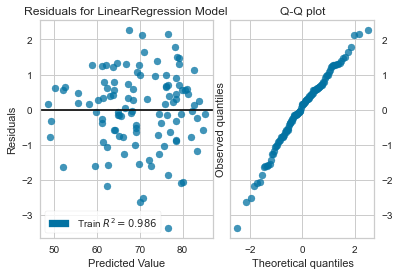

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [569]:
# Visualisation for residual plots ; winter model
visualizer = ResidualsPlot(lm_winter, hist=False, qqplot=True)
# Fitting the data to the residual plot
visualizer.fit(missing_data_naWinter[variables_list],missing_data_naWinter['delivery_charges'])
# printing the plot
visualizer.show()

The model proves that 'delivery_charges' is linear to the varaibles as the R-square value for train data is 0.986 for winter season. The model has learned to predict accurate target variable.

**Summer Model**

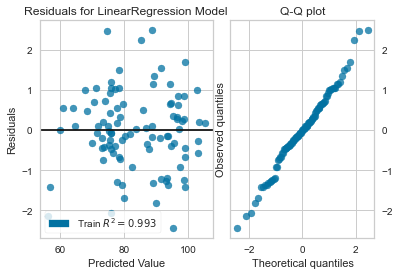

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [570]:
# Visualisation for residual plots ; summer model
visualizer = ResidualsPlot(lm_summer, hist=False, qqplot=True)
# Fitting the data to the residual plot
visualizer.fit(missing_data_naSummer[variables_list],missing_data_naSummer['delivery_charges'])
# printing the plot
visualizer.show()

The model proves that 'delivery_charges' is linear to the varaibles as the R-square value for train data is 0.993 for summer season. The model has learned to predict accurate target variable.

**Autumn Model**

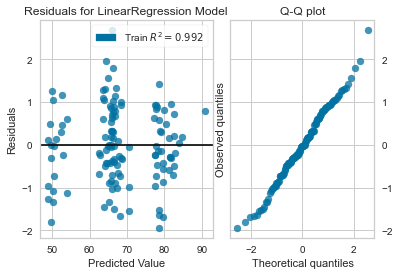

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [571]:
# Visualisation for residual plots ; autumn model
visualizer = ResidualsPlot(lm_autumn, hist=False, qqplot=True)
# Fitting the data to the residual plot
visualizer.fit(missing_data_naAutumn[variables_list],missing_data_naAutumn['delivery_charges'])
# printing the plot
visualizer.show()

The model proves that 'delivery_charges' is linear to the varaibles as the R-square value for train data is 0.992 for autumn season. The model has learned to predict accurate target variable.

**Spring Model**

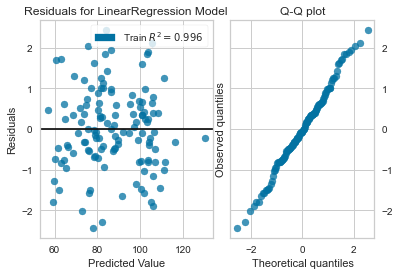

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [572]:
# Visualisation for residual plots ; spring model
visualizer = ResidualsPlot(lm_spring, hist=False, qqplot=True)
# Fitting the data to the residual plot
visualizer.fit(missing_data_naSpring[variables_list],missing_data_naSpring['delivery_charges'])
# printing the plot
visualizer.show()

The model proves that 'delivery_charges' is linear to the varaibles as the R-square value for train data is 0.996 for spring season. The model has learned to predict accurate target variable.

### 4.5.2 Model Predictions

**Winter predictions**

In [573]:
# predicting for delivery_charges null values of winter season
# and putting it in a list
solution_winter = list(lm_winter.predict(missing_data[missing_data['season']=='Winter'].loc[na_index,][variables_list]))

# index of the solution_winter list
i = 0

# iterating through each null delivery_charges cell of winter season
for index,row in missing_data[missing_data['season']=='Winter'].loc[na_index,['delivery_charges']].iterrows():
    
    # assigning the value to the delivery_charges col at index 
    # ith item in solution_winter is for index'th delivery_charges cell in missing_data
    missing_data.loc[index,['delivery_charges']] = round(solution_winter[i],2)
    
    # incrementing solution_winter index
    i = i + 1                                                         

Printing delivery_charges prediction for null cells.

In [574]:
 missing_data[missing_data['season']=='Winter'].loc[na_index,['delivery_charges']]

,delivery_charges
182,81.33
197,80.81
261,59.08
283,70.24
312,64.20
343,77.81
367,80.54
395,64.43
410,63.00
437,77.32


**Summer predictions**

In [575]:
# predicting for delivery_charges null values of summer season
# and putting it in a list
solution_summer = list(lm_summer.predict(missing_data[missing_data['season']=='Summer'].loc[na_index,][variables_list]))

# index of the solution_summer list
i = 0

# iterating through each null delivery_charges cell of summer season
for index,row in missing_data[missing_data['season']=='Summer'].loc[na_index,['delivery_charges']].iterrows():
    
    # assigning the value to the delivery_charges col at index 
    # ith item in solution_summer is for index'th delivery_charges cell in missing_data
    missing_data.loc[index,['delivery_charges']] = round(solution_summer[i],2)
    # incrementing solution_summer index
    i = i + 1                                                         

Printing delivery_charges prediction for null cells.

In [576]:
missing_data[missing_data['season']=='Summer'].loc[na_index,['delivery_charges']]

,delivery_charges
38,89.90
81,76.75
86,92.61
287,104.98
361,91.35


**Autumn predictions**

In [577]:
# predicting for delivery_charges null values of autumn season
# and putting it in a list
solution_autumn = list(lm_autumn.predict(missing_data[missing_data['season']=='Autumn'].loc[na_index,][variables_list]))

# index of the solution_autumn list
i = 0

# iterating through each null delivery_charges cell of autumn season
for index,row in missing_data[missing_data['season']=='Autumn'].loc[na_index,['delivery_charges']].iterrows():
    
    # assigning the value to the delivery_charges col at index 
    # ith item in solution_autumn is for index'th delivery_charges cell in missing_data
    missing_data.loc[index,['delivery_charges']] = round(solution_autumn[i],2)
    # incrementing solution_autumn index
    i = i + 1                                                         

Printing delivery_charges prediction for null cells.

In [578]:
missing_data[missing_data['season']=='Autumn'].loc[na_index,['delivery_charges']]

,delivery_charges
23,50.17
25,66.69
36,64.74
40,64.57
102,70.79
131,79.45
219,63.30
269,64.85
270,51.77
288,84.26


**Spring predictions**

In [579]:
# predicting for delivery_charges null values of spring season
# and putting it in a list
solution_spring = list(lm_spring.predict(missing_data[missing_data['season']=='Spring'].loc[na_index,][variables_list]))

# index of the solution_spring list
i = 0

# iterating through each null delivery_charges cell of spring season
for index,row in missing_data[missing_data['season']=='Spring'].loc[na_index,['delivery_charges']].iterrows():
    
    # assigning the value to the delivery_charges col at index 
    # ith item in solution_spring is for index'th delivery_charges cell in missing_data
    missing_data.loc[index,['delivery_charges']] = round(solution_spring[i],2)
    # incrementing solution_spring index
    i = i + 1                                                         

Printing delivery_charges prediction for null cells.

In [580]:
missing_data[missing_data['season']=='Spring'].loc[na_index,['delivery_charges']]

,delivery_charges
3,76.91
5,58.00
61,84.80
80,105.93
133,88.52
165,108.81
166,74.33
237,81.14
286,85.85
347,98.19


In [581]:
sum(missing_data['delivery_charges'].isnull())

0

No null values are left for delivery_charges column. 

## 4.6 Missing Data Solution

Since all the null values are evaluated we can not write the imputed missing_data into a csv.

In [582]:
missing_data.to_csv('30154987_missing_data_solution.csv',index=False)

# 5. Outlier Data

The outlier data provided only contains outliers which needs to be detected for cleaning the dataset. 

In [583]:
outlier_data = pd.read_csv('30154987_outlier_data.csv')
outlier_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD156935,ID3202917978,2019-11-06,Thompson,"[('Lucent 330S', 1), ('Universe Note', 2), ('T...",16810,83.64,-37.807506,144.946621,0,16893.64,Spring,True,0.5765,very universal in use and was of applications....,False
1,ORD101569,ID0758611933,2019-11-15,Thompson,"[('iStream', 2), ('pearTV', 1)]",6610,102.20,-37.821541,144.945644,25,5059.70,Spring,True,0.9951,five stars very good phone. work good,True
2,ORD356885,ID0547588442,2019-03-16,Bakers,"[('Lucent 330S', 1), ('Olivia x460', 1), ('Tos...",11135,79.88,-37.815853,144.988007,25,8431.13,Autumn,True,0.9104,in love i totally love my phone... it's worth ...,True
3,ORD493249,ID6167489432,2019-07-01,Thompson,"[('Lucent 330S', 2), ('Toshika 750', 2)]",11100,64.59,-37.811961,144.959474,0,11164.59,Winter,True,1.0938,poor bad alcon,False
4,ORD056801,ID0255058773,2019-11-11,Nickolson,"[('Thunder line', 2), ('Toshika 750', 2), ('pe...",23760,99.06,-37.812821,144.971804,10,21483.06,Spring,True,0.6726,camera flash the phone is fantastic. the only ...,True


## 5.1 Outlier Data Exploration

Basic boxplots are plotted to get an idea of how many possible but not exact outliers are present for each season.

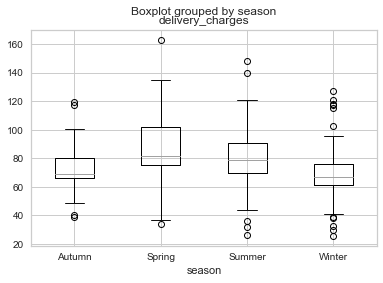

In [584]:
%matplotlib inline

# boxplot for 'delivery_charges' by 'season'
bp = outlier_data.boxplot(column='delivery_charges', by = 'season')

The above box plot only shows potential outliers that are just related to season i.e. in relation to 1 variable (univariate analysis). This output isn't trustable as it only takes into consideration "season" as a variable in correlation to 'delivery_charges'.

## 5.2 Model Building & Outlier Detection

It is know  that 'delivery_charges' has a linear relationship to 'is_happy_customer', 'distance_to_nearest_warehouse' and 'is_expedited_delivery'. Building a model and then visualizing the residual plots for outliers is an approach that can be utilized to recognize potential outliers from the dataset. Furthermore, each season will have a different model as 'delivery_charges' follow a different linear relationship with for each season. Let's make models and plot residual plots for each season using 'sklearn' and 'yellowbricks' library.

Winter


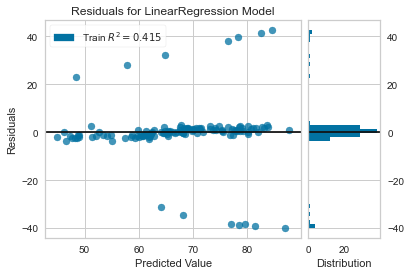

..........................................................


Summer


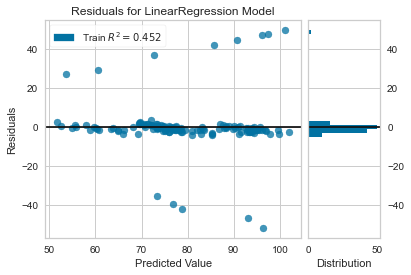

..........................................................


Autumn


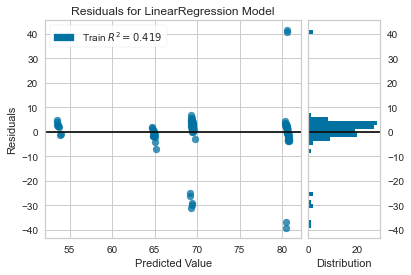

..........................................................


Spring


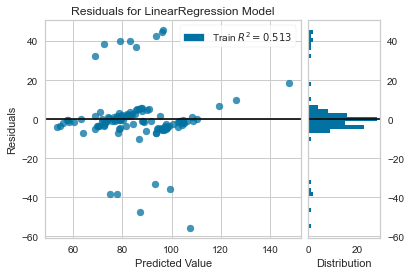

..........................................................




In [585]:
# A list which has all the season's name in it 
season_list = ['Winter','Summer','Autumn','Spring']

# looping through season list to fit a model and plot the residual plots
for season in season_list:
    
    # print the season name to specify what season the model is for
    print(season)
    
    # creating a model instance
    season_model =  LinearRegression() 
    
    # building a residual plot for each season. 
    residual_visualizer = ResidualsPlot(season_model)
    # fitting the data for the specified season
    residual_visualizer.fit(outlier_data[outlier_data['season']==season][variables_list], outlier_data[outlier_data['season']==season]['delivery_charges'])
    # visualising the residual plots
    residual_visualizer.show()
    
    # line break
    print("..........................................................\n\n")

From the above residual plots we can observe the following for each season:
- **Winter** :
    - The data points with high residual can be see clustered closely around -40 and +40 residual value.
- **Summer** :
    - Datapoints with high residuals are near -40 or +40 and are potential outliers.
- **Autumn** :
    - The outliers for Autumn are very clear and are very far from the 0th line. Datapoints below -20 and above 40 are together and are potential outliers.
- **Spring** : 
    - This season seems to have more datapoints with high residuals compared to others. The residuals with absolute value more than 40 are possible outliers as they deviate more from the 0 residual value. Some residuals are close to -60 and most have an absolute value near 50.
    
Since Cook's distance for detecting influential data points and residual plots can be utilized to decrease outliers i.e. datapoints with residuals with an absolute value above or equal to 40 seem to be potential outliers for most of the seasons except Autumn which have high residuals with absolute values near or more than 30 are its outliers. Let's check if these points are influential on Cook's distance plot.

In [586]:
# For visualising cook's distance it is best to convert boolean attributes to float
# is_expedited_delivery and is_happy_customer are boolean variables in the dataset
outlier_data['is_expedited_delivery']= outlier_data['is_expedited_delivery'].astype(float)
outlier_data['is_happy_customer']= outlier_data['is_happy_customer'].astype(float)

Let's find most optimal cook's distance for each model to removes highly influential outliers from the dataset.

Winter


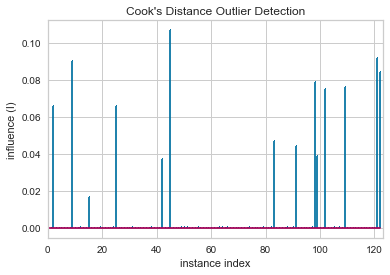

..........................................................


Summer


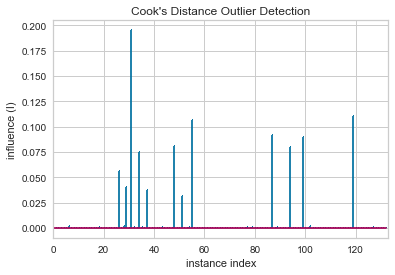

..........................................................


Autumn


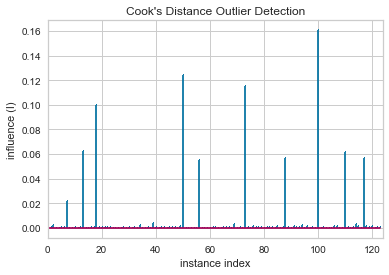

..........................................................


Spring


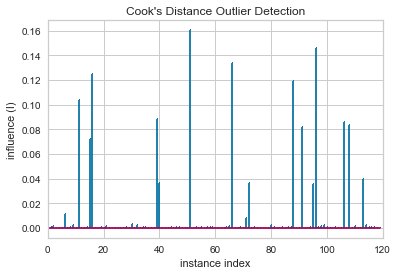

..........................................................




In [587]:
# looping through season list to fit a model and plot the residual plots
for season in season_list:
    
    # print the season name to specify what season the plot for
    print(season)
    
    # taking Feature variables from the dataset for 'season'
    X_variables = outlier_data[outlier_data['season']==season][variables_list]
    
    # taking traget variables from the dataset for 'season'
    y_target = outlier_data[outlier_data['season']==season]['delivery_charges']
    
    #visualising cook's distance plot for each model for deciding on each threshold distance
    # for each plot we need to decide the cook's distance so that it also decreases the datapoints with high residuals
    # Cook's distance and residual plot explain outliers.
    cooks_distance(X_variables, y_target,draw_threshold=False,linefmt="C0-", markerfmt=",")
    
    # line break
    print("..........................................................\n\n")

From the above plot, it seems that data points with influence distance equal or above 0.05 are highly influential and can potential be our final outliers. Plotting the residuals will give a clear picture of what removal of those influential points (distance >=0.05) will have an impact on the residual plot of the model. Furthermore, it will also inform if setting the threshold distance =0.05 will surely remove data points with high residuals as studied in previous residual plots.

Winter


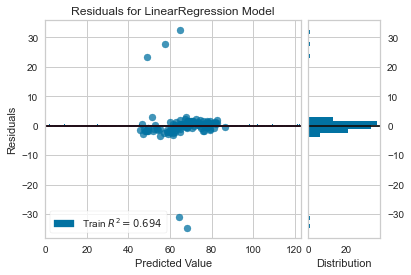

Winter outliers: 9 
Non-outliers for Winter : 123
..........................................................

Summer


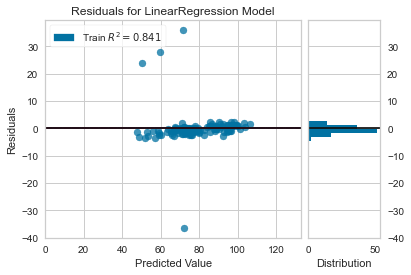

Summer outliers: 9 
Non-outliers for Summer : 133
..........................................................

Autumn


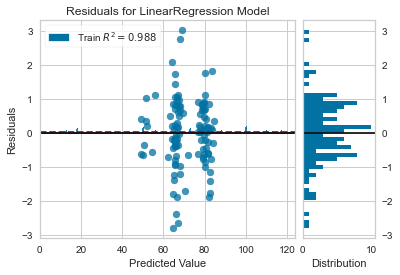

Autumn outliers: 9 
Non-outliers for Autumn : 124
..........................................................

Spring


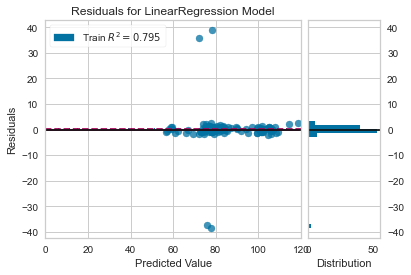

Spring outliers: 11 
Non-outliers for Spring : 120
..........................................................

............Total Outliers in the dataset: 38 ............


In [588]:
# variable to store total number of outliers
total_outlier = 0
# list to store index of non-outlier data
final_index = list()

# looping through season list to fit a model and plot the residual plots
for season in season_list:
    
    # print the season name to specify what season the plot for
    print(season)
    
    # Calling the CooksDistance model inistance 
    visualizer_cooks = CooksDistance()
    # training data for 'season'
    X_variables = outlier_data[outlier_data['season']==season][variables_list] # features 
    y_target = outlier_data[outlier_data['season']==season]['delivery_charges'] # target values with 'delivery_charges'

    # fitting the model for cooks distance to find influence distance of all the datapoints
    visualizer_cooks.fit(X_variables, y_target)
    
    # forming a boolena list of data who have influence distance below 0.05
    less_influential_outlier = (visualizer_cooks.distance_ <= 0.05)
    
    # Collecting the feature datapoints of less influential datapoints
    X_less_influential_outlier= outlier_data[outlier_data['season']==season][variables_list][less_influential_outlier]
    # Collecting the target datapoints of less influential datapoints
    y_less_influential_outlier = outlier_data[outlier_data['season']==season]['delivery_charges'][less_influential_outlier]
    
    # making a final list of indexes wihich are less influential and non outliers
    for valid_data in X_less_influential_outlier.index:
        final_index.append(valid_data)
    
    # Remodelling after outlier removal
    model = LinearRegression()
    # residual plot visualiser for the new model
    visualizer_residuals = ResidualsPlot(model)
    # fitting the non outlier data to the visualiser
    visualizer_residuals.fit(X_less_influential_outlier, y_less_influential_outlier)
    # Visualising the residual ... show() is called
    visualizer_residuals.show()
    
    # printing outlier number and total non outlier datapoints for a paticular season
    print(season,"outliers:",len(y_target)-len(y_less_influential_outlier),"\nNon-outliers for",season,":",len(y_target))
    
    # calculating total outliers after each season visualisation
    total_outlier = total_outlier + len(y_target)-len(y_less_influential_outlier)
    
     # line break
    print("..........................................................\n")
    

#printing the total number of outliers in the data
print("............Total Outliers in the dataset:",total_outlier,"............")

All models have accuracy (r-square) more than or equal to 70%. Autumn has the highest accuracy standing at 98.8%.

## 5.3 Outlier Removal

From the above plots distance of 0.05 as the threshold was a good decision as it removes high residual data points that are highly influential. In total, 38 outliers are found in the dataset. All of the seasons have 9 outliers except Spring which has 11 highly influential outliers. Furthermore, outlier removal has also increased the R-square value of all the models by a minimum of 20%. Removal of outliers from the original dataset needs to be done for the final solution.

In [589]:
# Converting is_expedited_delivery and is_happy_customer back to boolean datatypes
outlier_data['is_expedited_delivery']= outlier_data['is_expedited_delivery'].astype(bool)
outlier_data['is_happy_customer']= outlier_data['is_happy_customer'].astype(bool)

#  iterating through the dataframe. Printing and removing the outlier.
for index,row in outlier_data.iterrows():
    
    # if index is not in the final non index list i.e. final_index than it's an outlier
    if index not in final_index:
        
        # printing season and it's outlier feature and target. Printing all 38 outliers.
        print(row['season'],"Outlier:",list(row),"\n")
        # dropping the outliers from the dataset
        outlier_data.drop(index)


Winter Outlier: ['ORD135339', 'ID0578058793', '2019-07-08', 'Thompson', "[('iAssist Line', 2), ('pearTV', 1), ('Lucent 330S', 1), ('Toshika 750', 1)]", 16310, 120.48, -37.824805299999994, 144.9470552, 0, 16430.48, 'Winter', True, 1.3505, 'best mid-range smartphone! best android device on the market for under $500', True] 

Winter Outlier: ['ORD085366', 'ID0583473685', '2019-06-23', 'Bakers', "[('Lucent 330S', 2), ('Alcon 10', 2), ('Thunder line', 1), ('Universe Note', 2)]", 29440, 38.175, -37.80469650000001, 144.9985598, 15, 25062.175, 'Winter', True, 0.6585, "the option to make a slideshow with music i couldn't figure it out. i like how fast the reaction time during game play even with the limited data we have here in dutch harbor alaska.", True] 

Spring Outlier: ['ORD188415', 'ID0458643322', '2019-09-04', 'Thompson', "[('iStream', 2), ('Olivia x460', 2), ('Lucent 330S', 1)]", 3980, 163.095, -37.7989322, 144.944273, 0, 4143.095, 'Spring', True, 1.5492, 'works great has everything i n

## 5.4 Outlier Data Solution

Finally writing the outlier free solution in the csv. 

In [590]:
outlier_data.to_csv('30154987_outlier_data_solution.csv', index=False)

## C. Conclusion
The assignment had three topics to work on and each one provided a challenge on its own. It can be concluded that finding errors in the data it the toughest part of data cleansing as it requires a Data Scientist to think about the cases where the data can be faulty. Knowing the background of the data beforehand is highly important for finding the errors or imputing the data. Furthermore, it was fascinating to see that each column has 27 errors if it had any errors. This situation may not be present in real-life situations datasets which also says that the data was intentionally disfigured or artificially generated.

Filling the missing data was easy as most of the columns could be calculated using functions formed in the Dirty data section of the assessment. The model building helped to utilize the business rules which in turn imputed the data. 

Finally, outliers detection presented a challenge as it wasn't easy to come up with the most suitable outliers by just plotting the box plots or just looking at the residual plots. Cook's distance along with residual plots for each model helped decide on what is the most preferred outlier. It is difficult to always find the exact number of outliers as some of them will always exist in the data relative to the model. 

## D. References

- Outlier - https://www.scikit-yb.org/en/latest/api/regressor/influence.html
- Outlier - https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
- Distance between 2 coordiantes - https://www.geeksforgeeks.org/program-distance-two-points-earth/#:~:text=For%20this%20divide%20the%20values,is%20the%20radius%20of%20Earth.
- Distance between 2 coordiantes - https://gist.github.com/rochacbruno/2883505